# Plotting Vectors
- This tutorial can be found at this [link](https://www.pygmt.org/latest/tutorials/advanced/vectors.html)
- In this tutorial, we will learn how to plot vectors

In [1]:
import numpy as np
import pygmt

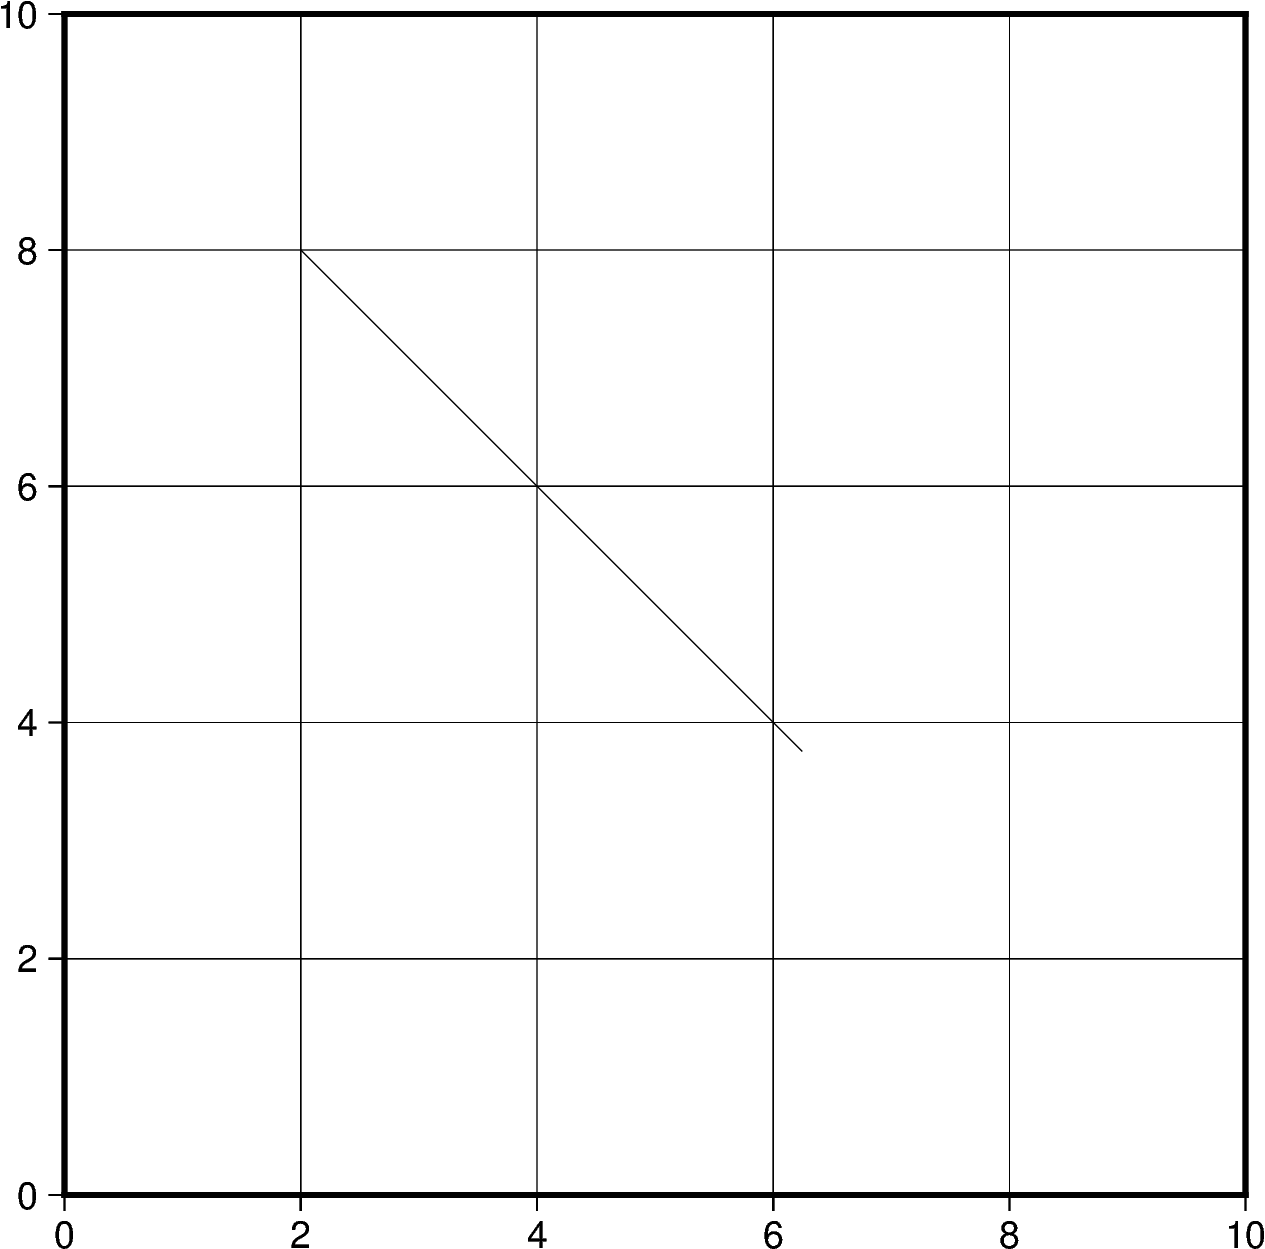

In [2]:
# Plotting Cartesian Vectors
# `x` and `y` denote the starting point
# `direction` is a list of 2 1D arrays: [[angle_in_degrees], [length]]
# Angle is measured in degrees and moves counter-clockwise from the horizontal
# Length of the vector uses `cm` by default but can be changed using pygmt.config

fig = pygmt.Figure()
fig.plot(
    region=[0, 10, 0, 10],
    projection="X10c/10c",
    frame="ag",
    x=2, y=8,
    style="v0c",
    direction=[[-45], [6]],
)
fig.show()

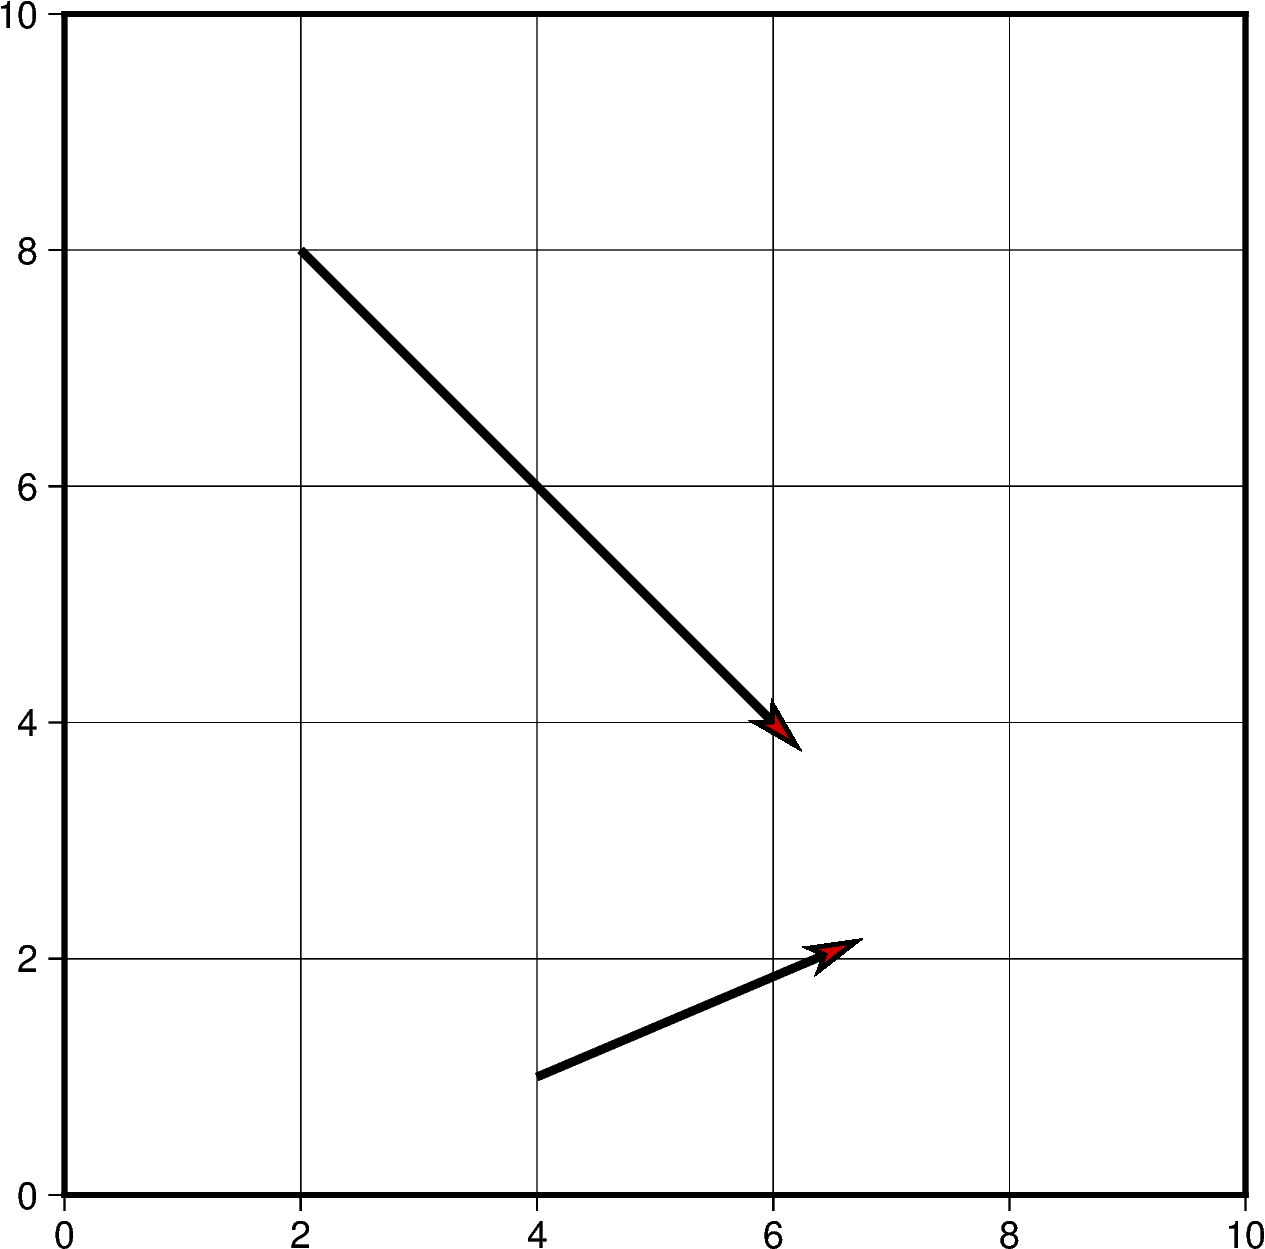

In [3]:
# Plotting multiple vectors and including a red arrow head, `+e`
fig = pygmt.Figure()
fig.plot(
    region=[0, 10, 0, 10],
    projection="X10c/10c",
    frame="ag",
    x=[2, 4], y=[8, 1],
    style="v0.5c+e",
    direction=[[-45, 23], [6, 3]],
    pen="2p", color="red3"
)
fig.show()

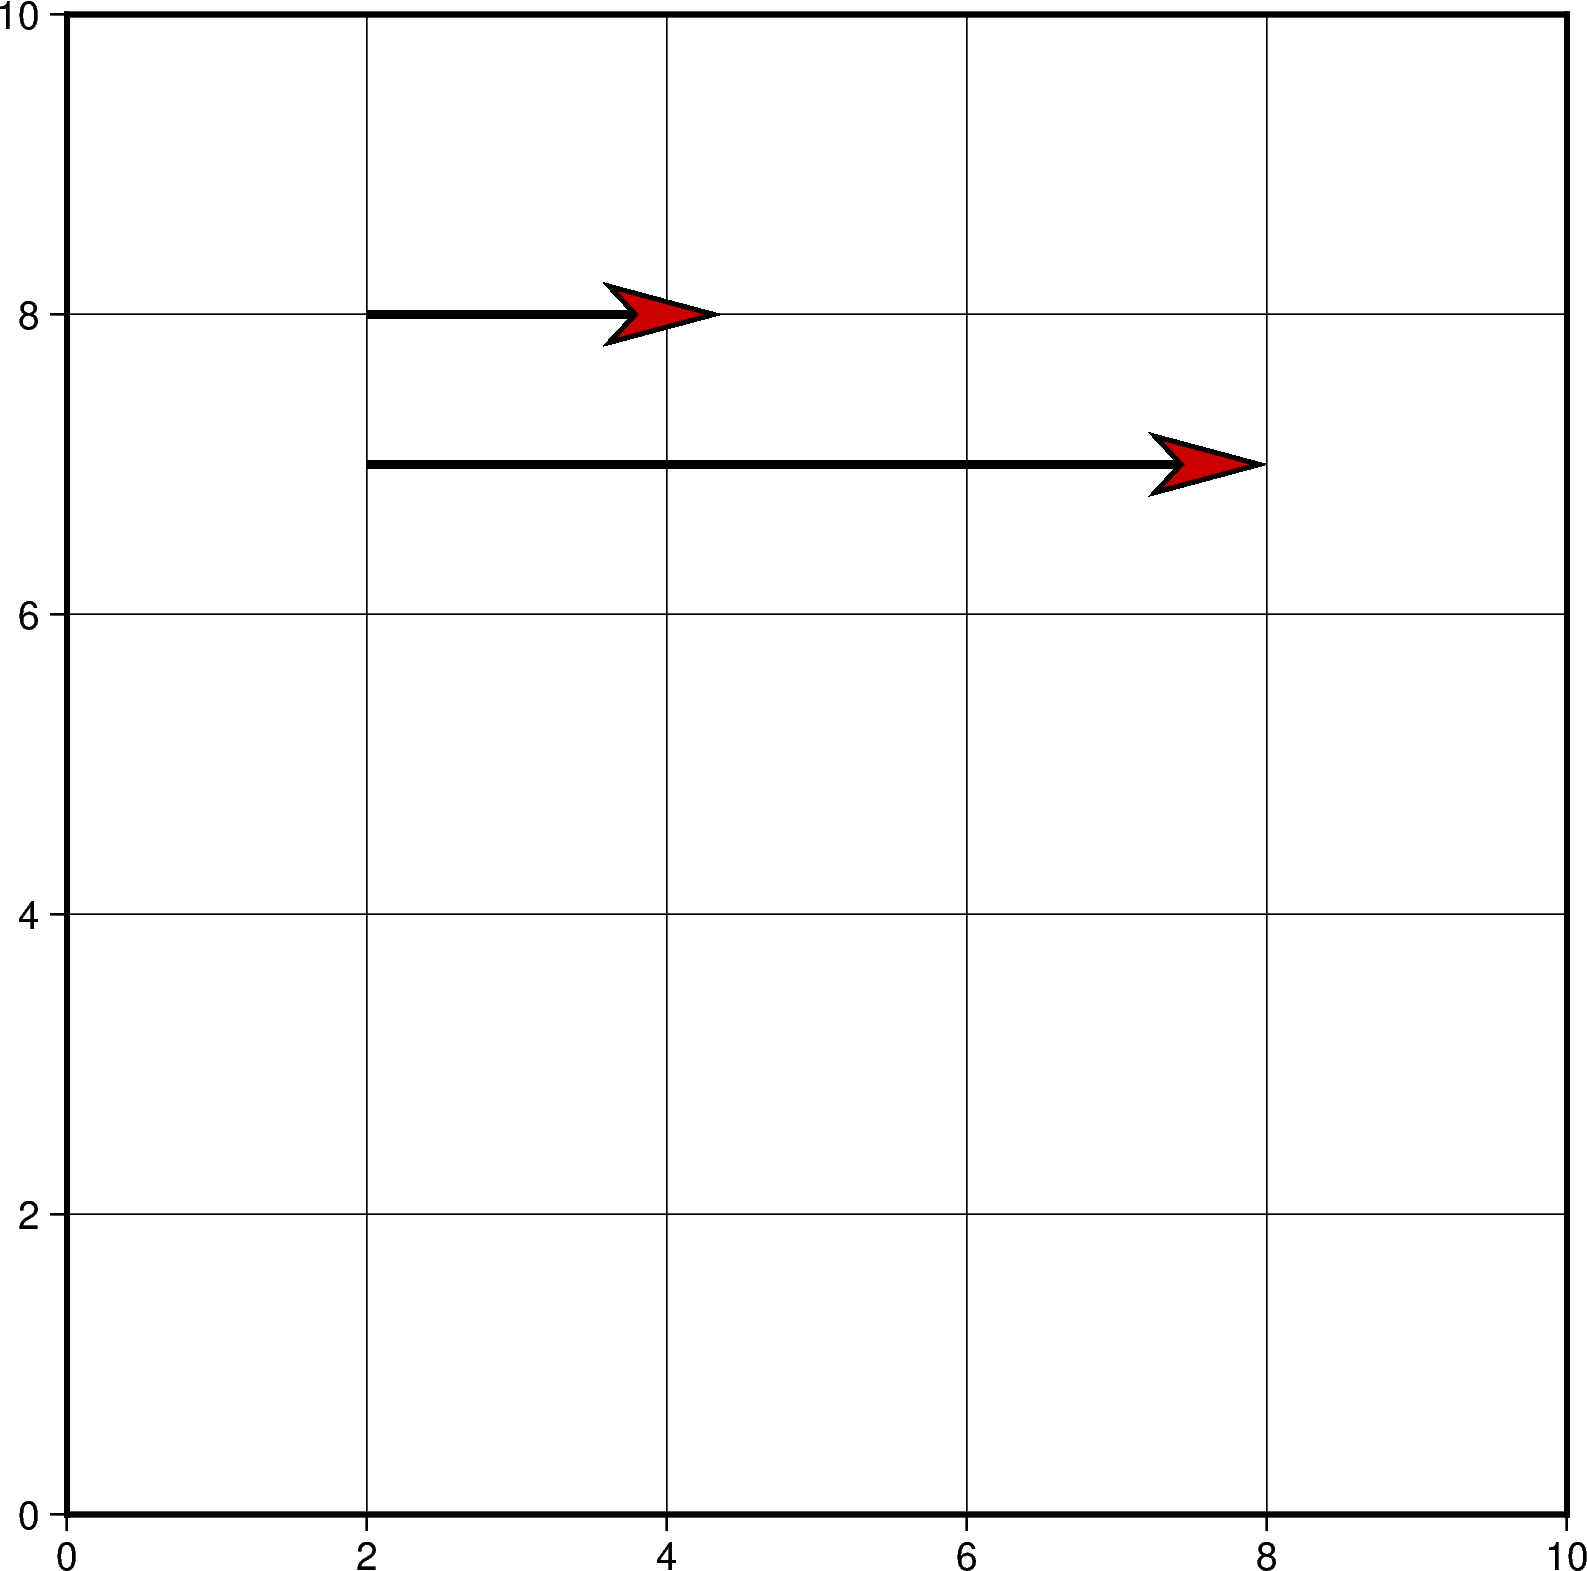

In [4]:
# Changing the default unit of vector length

fig = pygmt.Figure()
# Vector 1 with default unit as cm
fig.plot(
    region=[0, 10, 0, 10],
    projection="X5i/5i",
    frame="ag",
    x=2,
    y=8,
    style="v1c+e",
    direction=[[0], [3]],
    pen="2p",
    color="red3",
)
# Vector 2 after changing default unit to inch
with pygmt.config(PROJ_LENGTH_UNIT="i"):
    fig.plot(
        x=2,
        y=7,
        direction=[[0], [3]],
        style="v1c+e",
        pen="2p",
        color="red3",
    )
fig.show()

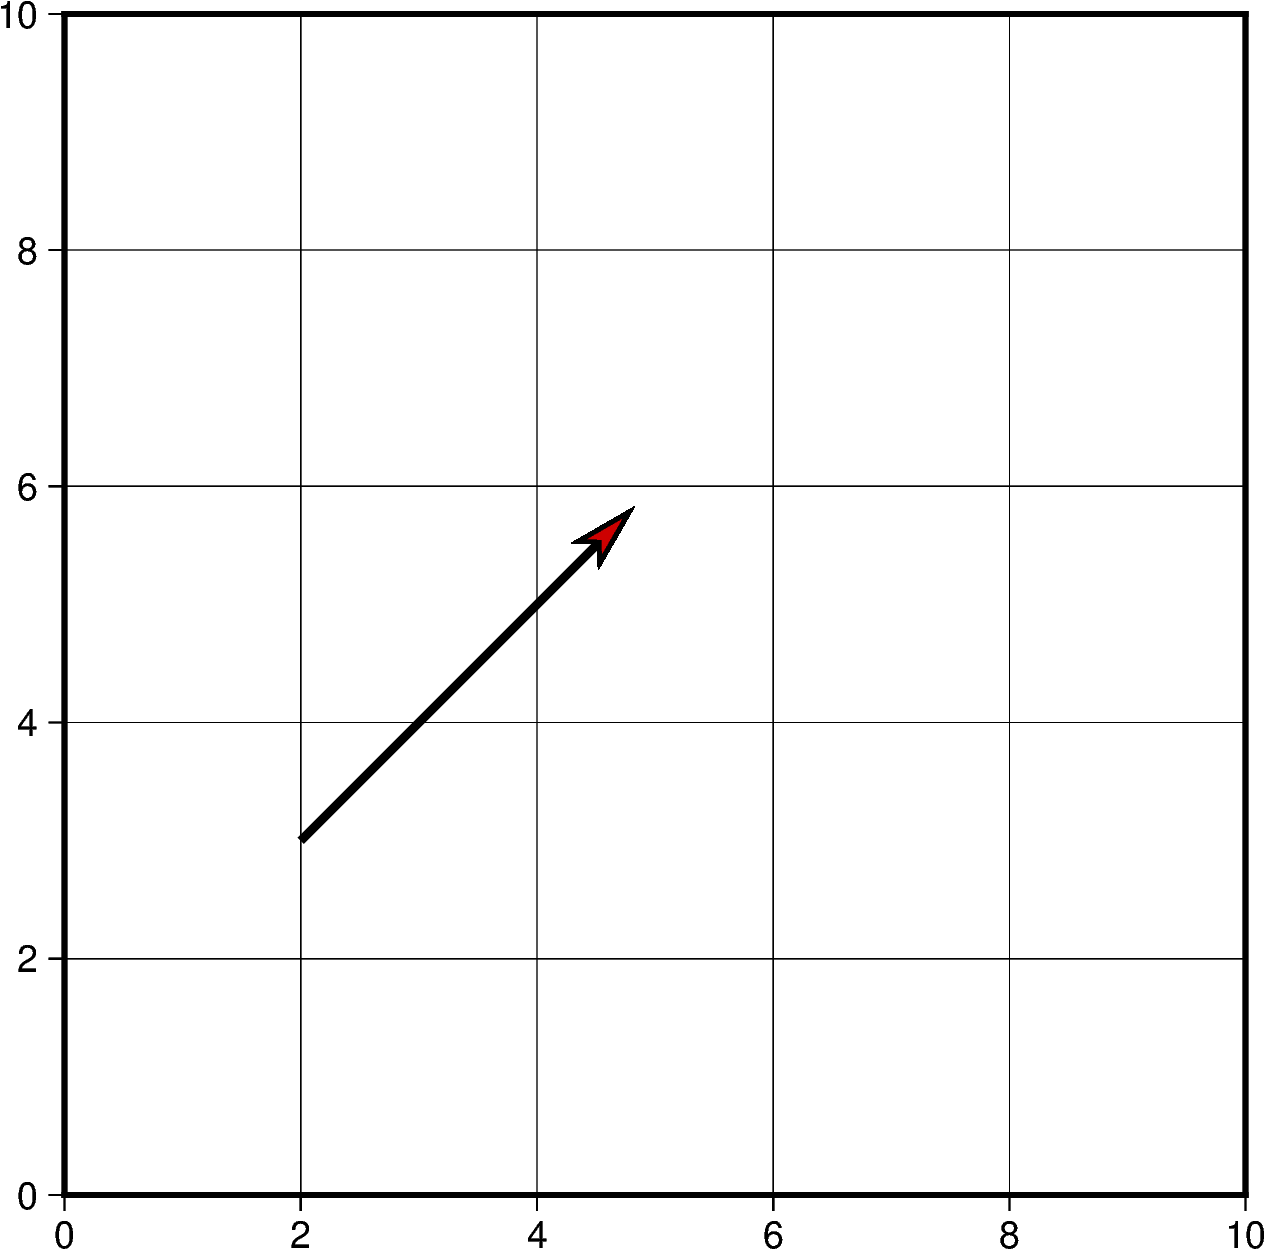

In [5]:
# Including all the vector's information in a single list
# [x_start, y_start, direction_degrees, length]

# Create a list of lists that include each vector information
vectors = [[2, 3, 45, 4]]

fig = pygmt.Figure()
fig.plot(
    region=[0, 10, 0, 10],
    projection="X10c/10c",
    frame="ag",
    data=vectors,
    style="v0.6c+e",
    pen="2p",
    color="red3",
)
fig.show()

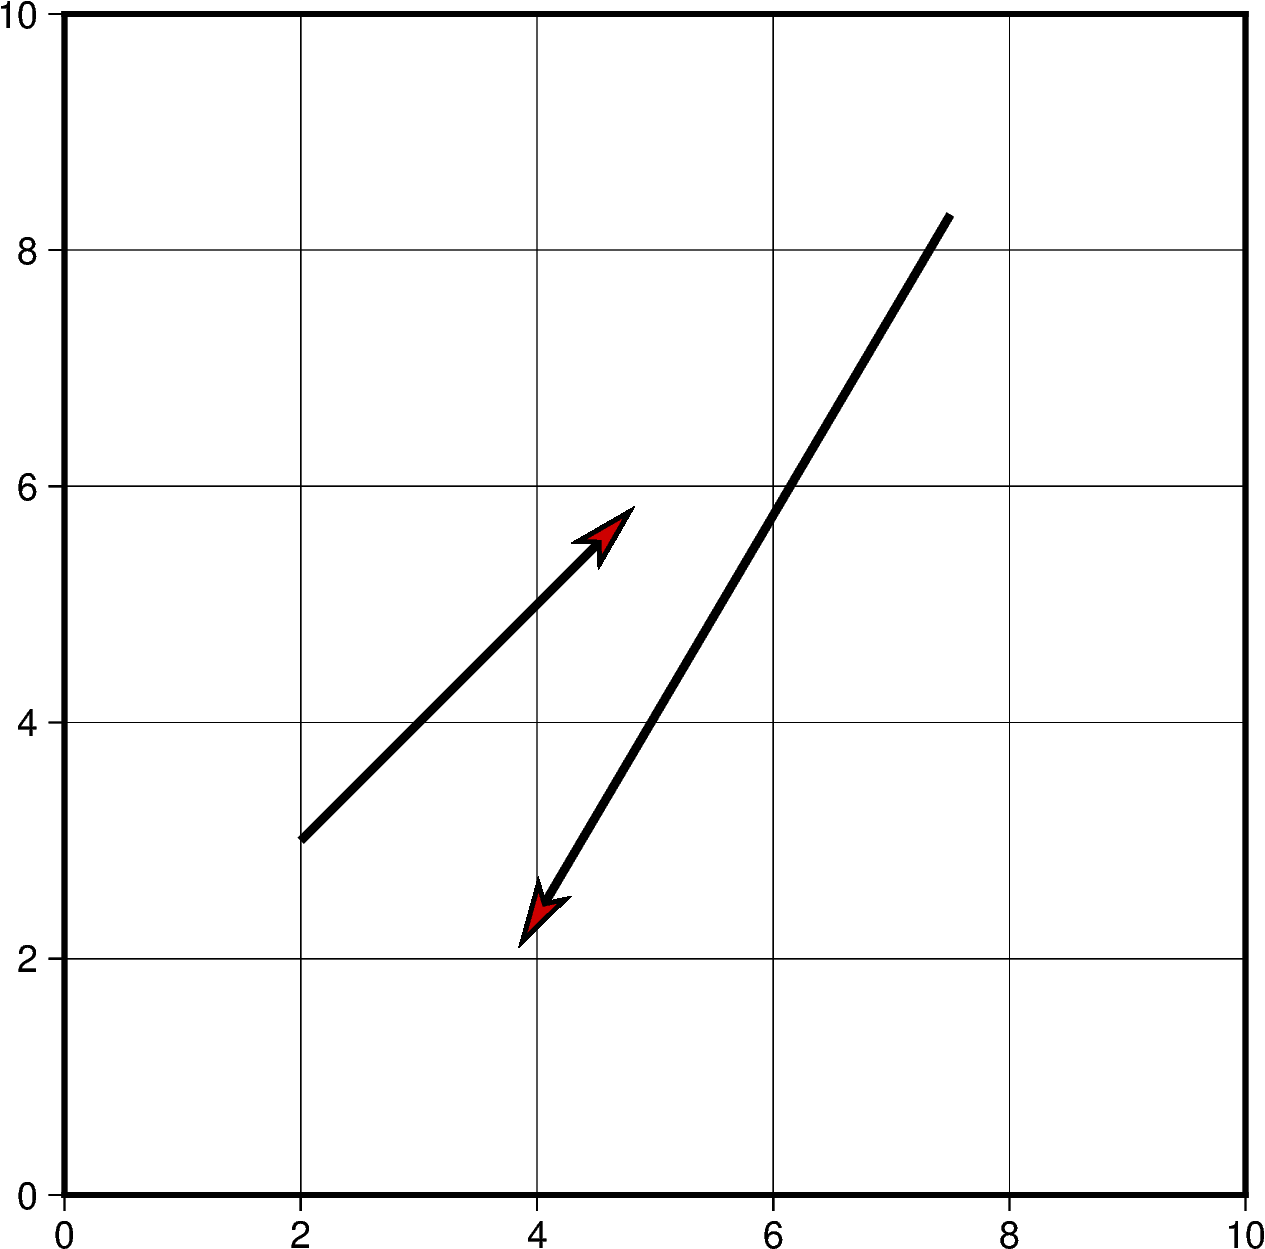

In [6]:
# Plotting multiple vectors using the previous terminology
vector_1 = [2, 3, 45, 4]
vector_2 = [7.5, 8.3, -120.5, 7.2]
vectors = [vector_1, vector_2]

fig = pygmt.Figure()
fig.plot(
    region=[0, 10, 0, 10],
    projection="X10c/10c",
    frame="ag",
    data=vectors,
    style="v0.6c+e",
    pen="2p",
    color="red3",
)
fig.show()

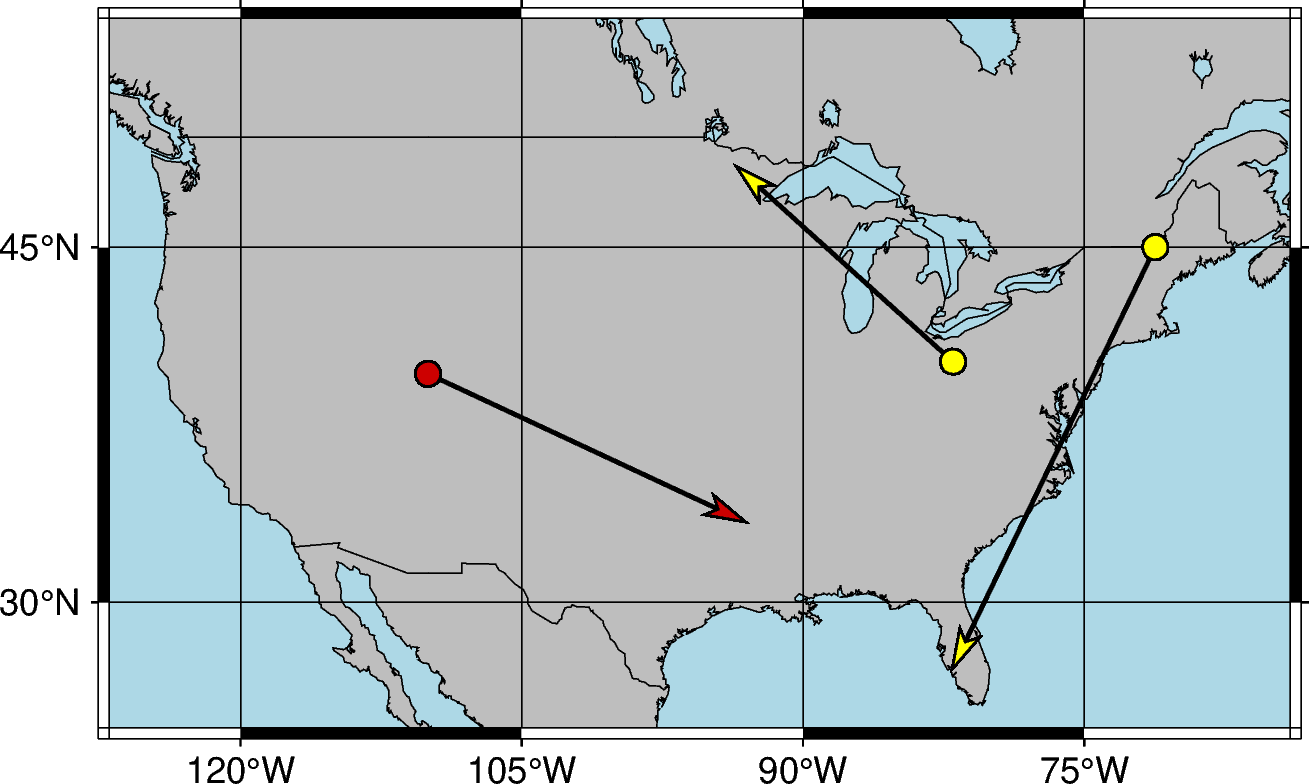

In [7]:
# Create a plot with coast, Mercator projection (M) over the continental US
fig = pygmt.Figure()
fig.coast(
    region=[-127, -64, 24, 53],
    projection="M10c",
    frame="ag",
    borders=1,
    shorelines="0.25p,black",
    area_thresh=4000,
    land="grey",
    water="lightblue",
)

# Plot a vector using the x, y, direction parameters
# `+b` Beginning point of the vector should take the shape of a circle
# `+e` Ending point of the vector should take an arrow shape
# '+a' specifies the angle of the vector head apex
style = "v0.4c+bc+ea+a30"
fig.plot(
    x=-110, y=40,
    style=style,
    direction=[[-25], [3]],
    pen="1p",
    color="red3",
)

vector_2 = [-82, 40.5, 138, 2.5]
vector_3 = [-71.2, 45, -115.7, 4]
vectors = [vector_2, vector_3]

# Plot vectors using the data parameter.
fig.plot(
    data=vectors,
    style=style,
    pen="1p",
    color="yellow",
)
fig.show()

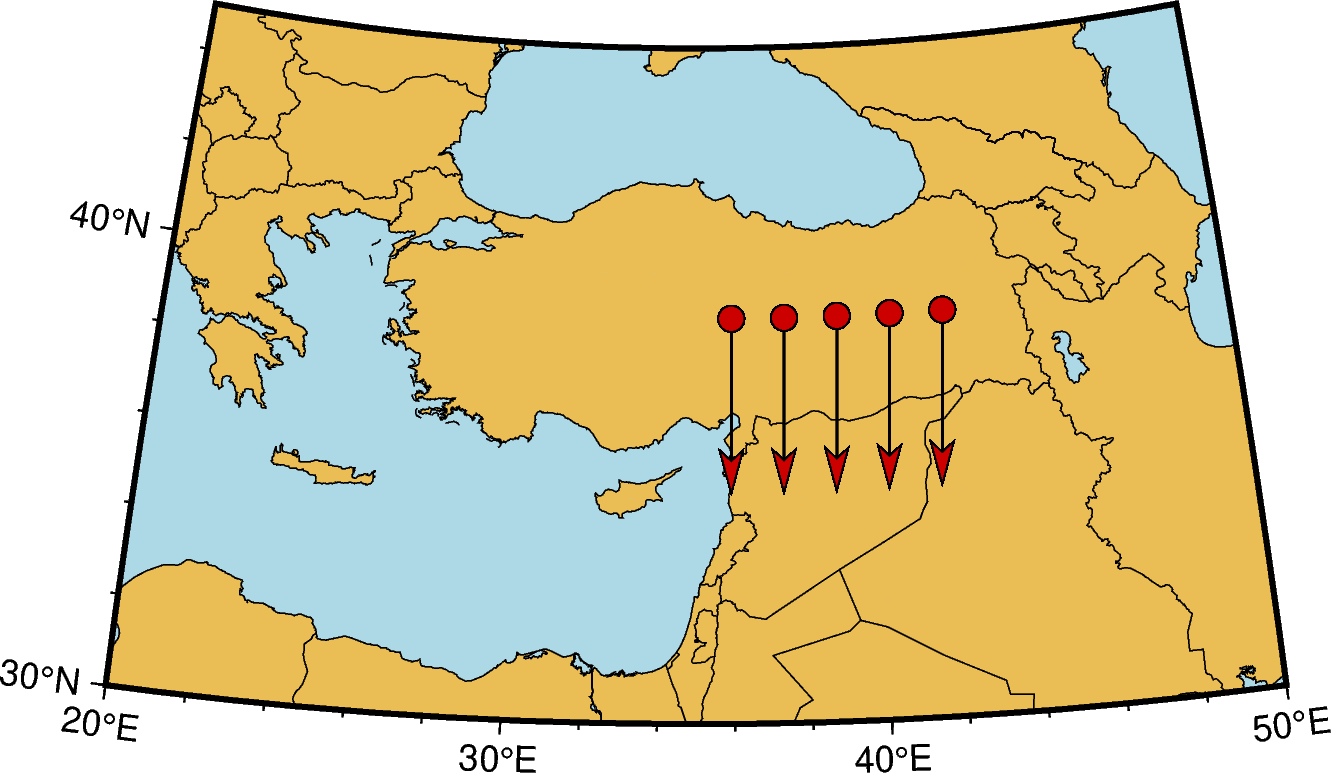

In [8]:
# Another example of plotting cartesian vectors over a coast plot
x = np.linspace(36, 42, 5)  # x values = [36.  37.5 39.  40.5 42. ]
y = np.linspace(39, 39, 5)  # y values = [39. 39. 39. 39.]
direction = np.linspace(-90, -90, 5)  # direction values = [-90. -90. -90. -90.]
length = np.linspace(1.5, 1.5, 5)  # length values = [1.5 1.5 1.5 1.5]

# Create a plot with coast, Transverse Mercator projection (T) over the continental US
fig = pygmt.Figure()
fig.coast(
    region=[20, 50, 30, 45],
    projection="T35/10c",
    frame=True,
    borders=1,
    shorelines="0.25p,black",
    area_thresh=4000,
    land="lightbrown",
    water="lightblue",
)

fig.plot(
    x=x,
    y=y,
    style="v0.4c+ea+bc",
    direction=[direction, length],
    pen="0.6p",
    color="red3",
)

fig.show()

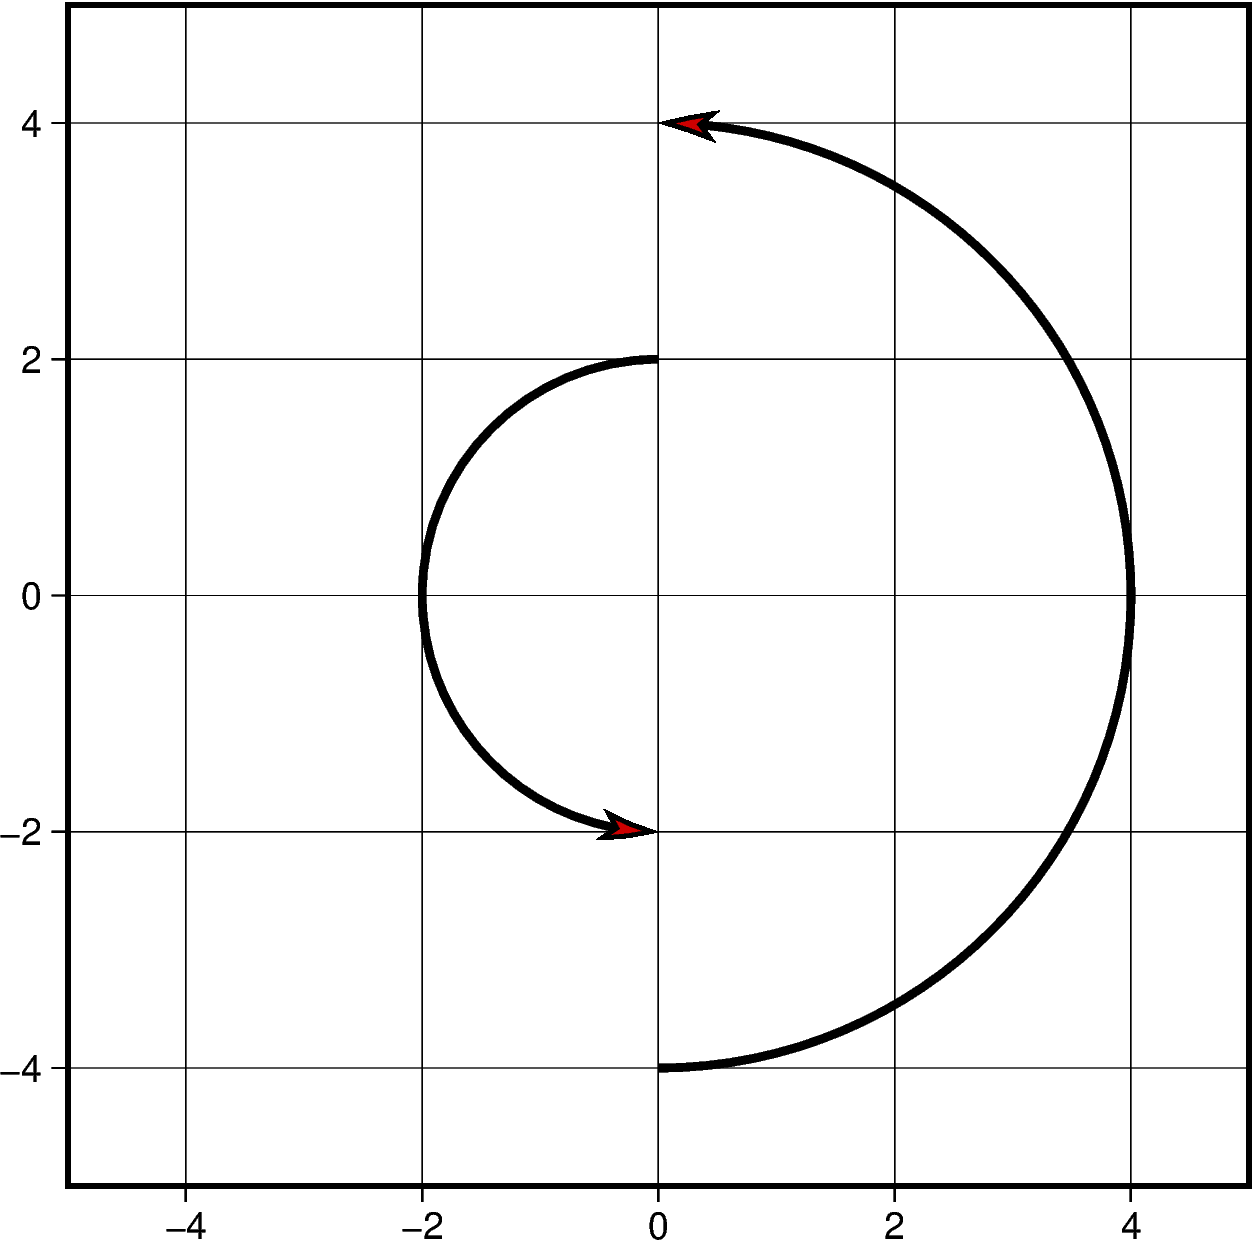

In [9]:
# Plotting circular vectors
# In this case, all the info for a single vector needs to be stored in a list
# `[x_start, y_start, radius, degree_start, degree_stop]`

fig = pygmt.Figure()

circular_vector_1 = [0, 0, 2, 90, 270]
data = [circular_vector_1]
fig.plot(
    region=[-5, 5, -5, 5],
    projection="X10c",
    frame="ag",
    data=data,
    style="m0.5c+ea", pen="2p", color="red3",
)

# Another example using np.array()
circular_vector_2 = [0, 0, 4, -90, 90]
data = np.array([circular_vector_2])

fig.plot(
    data=data,
    style="m0.5c+ea", pen="2p", color="red3",
)
fig.show()

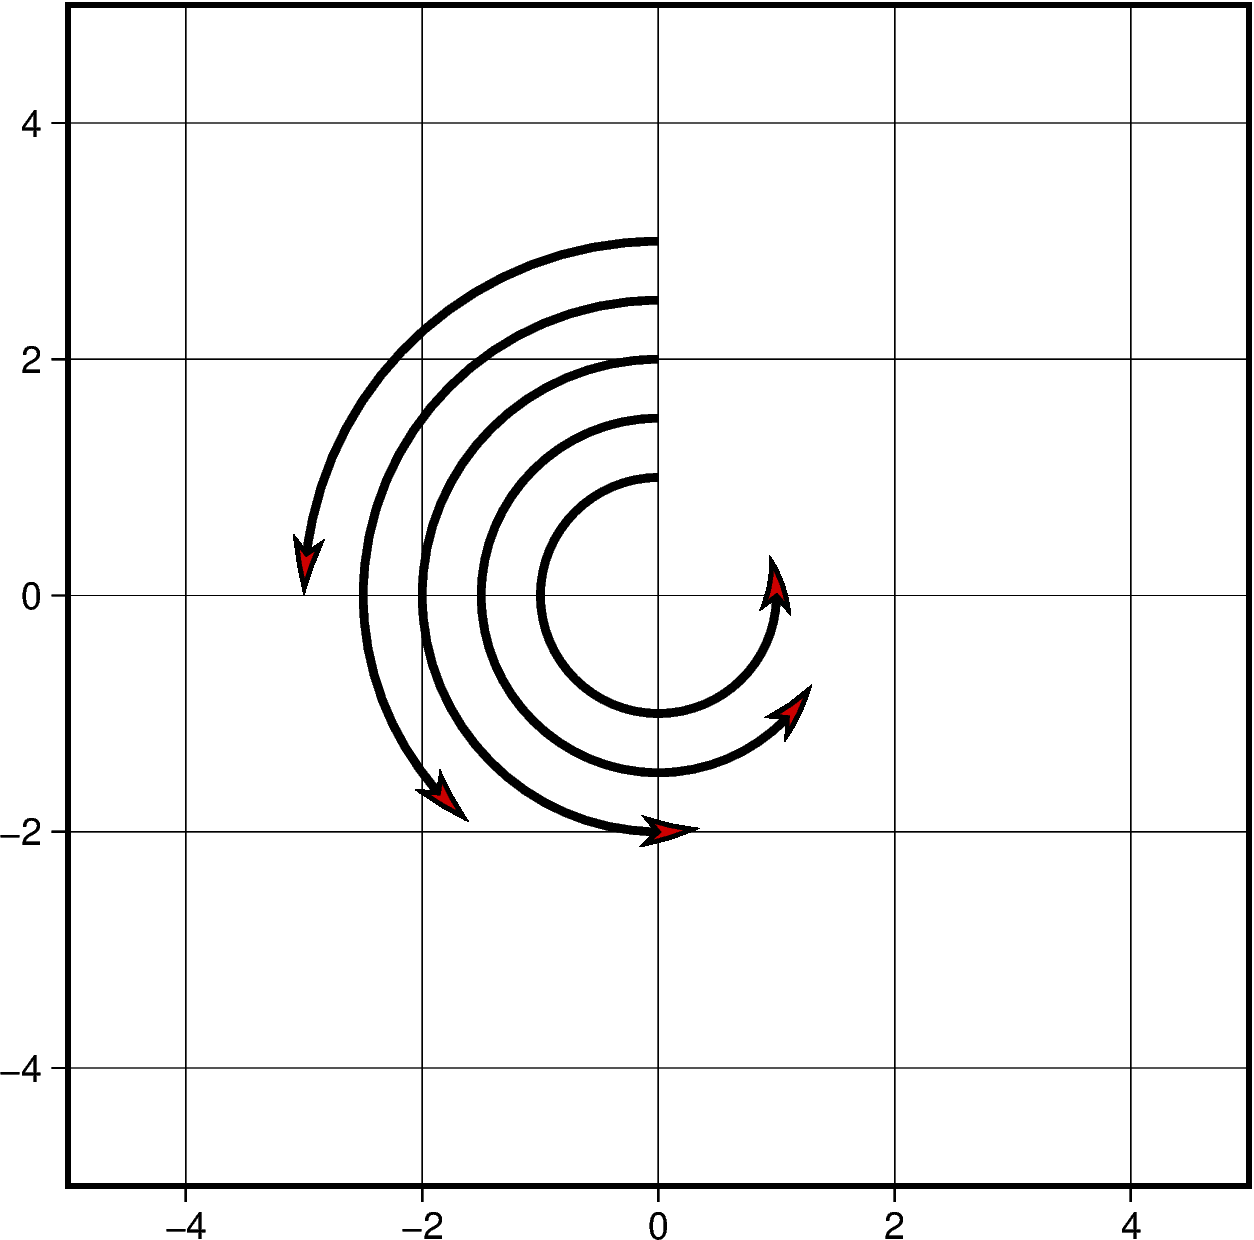

In [10]:
# Plotting multiple circular vectors
vector_num = 5
radius = 3 - (0.5 * np.arange(0, vector_num))
startdir = np.full(vector_num, 90)
stopdir = 180 + (50 * np.arange(0, vector_num))
data = np.column_stack(
    [np.full(vector_num, 0), np.full(vector_num, 0), radius, startdir, stopdir]
)

fig = pygmt.Figure()
fig.plot(
    region=[-5, 5, -5, 5],
    projection="X10c",
    frame="ag",
    data=data,
    style="m0.5c+ea",
    pen="2p",
    color="red3",
)
fig.show()

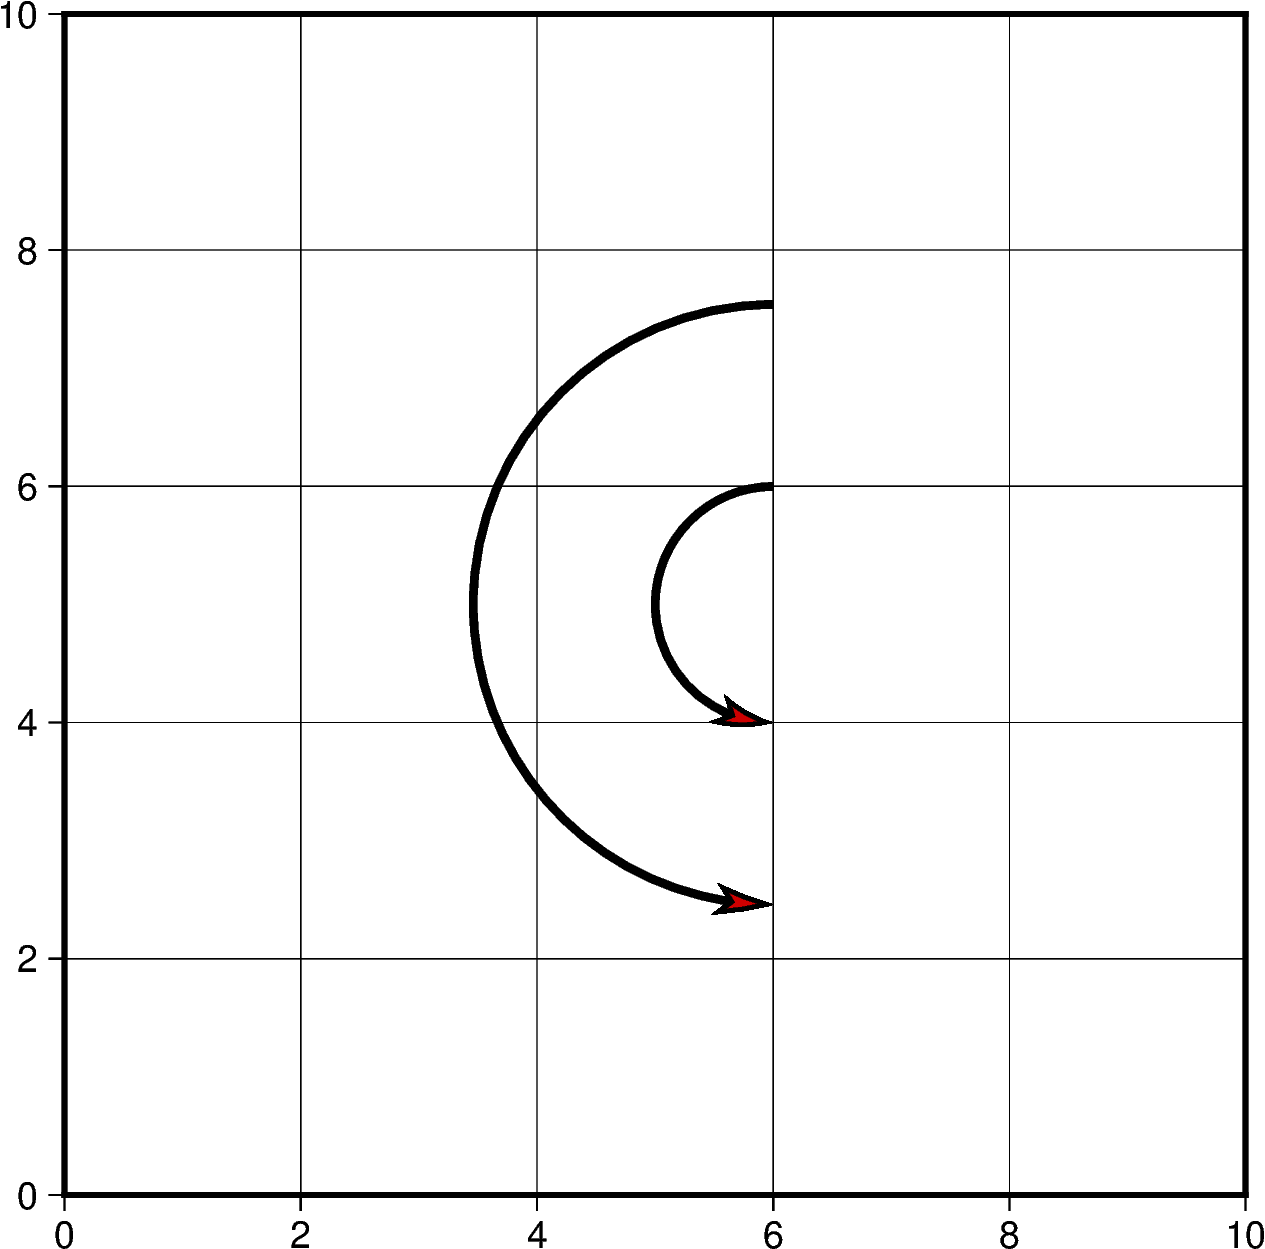

In [11]:
# Changing the default unit of the length
circular_vector = [6, 5, 1, 90, 270]

fig = pygmt.Figure()
fig.plot(
    region=[0, 10, 0, 10],
    projection="X10c",
    frame="ag",
    data=[circular_vector],
    style="m0.5c+ea",
    pen="2p",
    color="red3",
)

with pygmt.config(PROJ_LENGTH_UNIT="i"):
    fig.plot(
        data=[circular_vector],
        style="m0.5c+ea",
        pen="2p",
        color="red3",
    )
fig.show()

[[-114.742    44.0682  -87.6298   41.8781]]


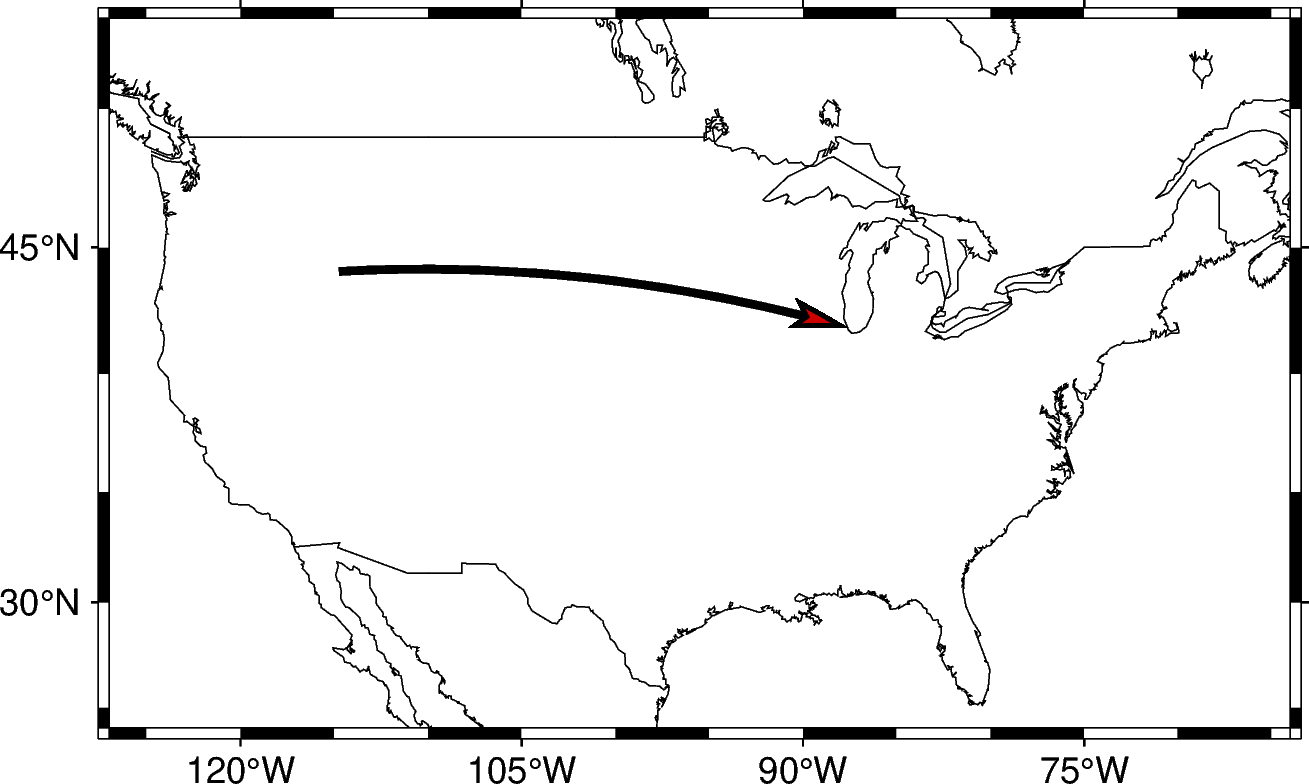

In [12]:
# Plotting geographic vectors
# Using the coordinate pairs to set the start and end points of the geographic vector
# Note that the `+s` is added to use a startpoint and an endpoint to represent 
# the vector instead of input angle and length.
# To style geographic vectors, use `=` at the beginning of the style parameter.

point_1 = [-114.7420, 44.0682]
point_2 = [-87.6298, 41.8781]
data = np.array([point_1 + point_2])
print(data)

fig = pygmt.Figure()
fig.coast(
    region=[-127, -64, 24, 53],
    projection="M10c",
    frame=True,
    borders=1,
    shorelines="0.25p,black",
    area_thresh=4000,
)
fig.plot(
    data=data,
    style="=0.5c+ea+s",
    pen="2p",
    color="red3",
)
fig.show()

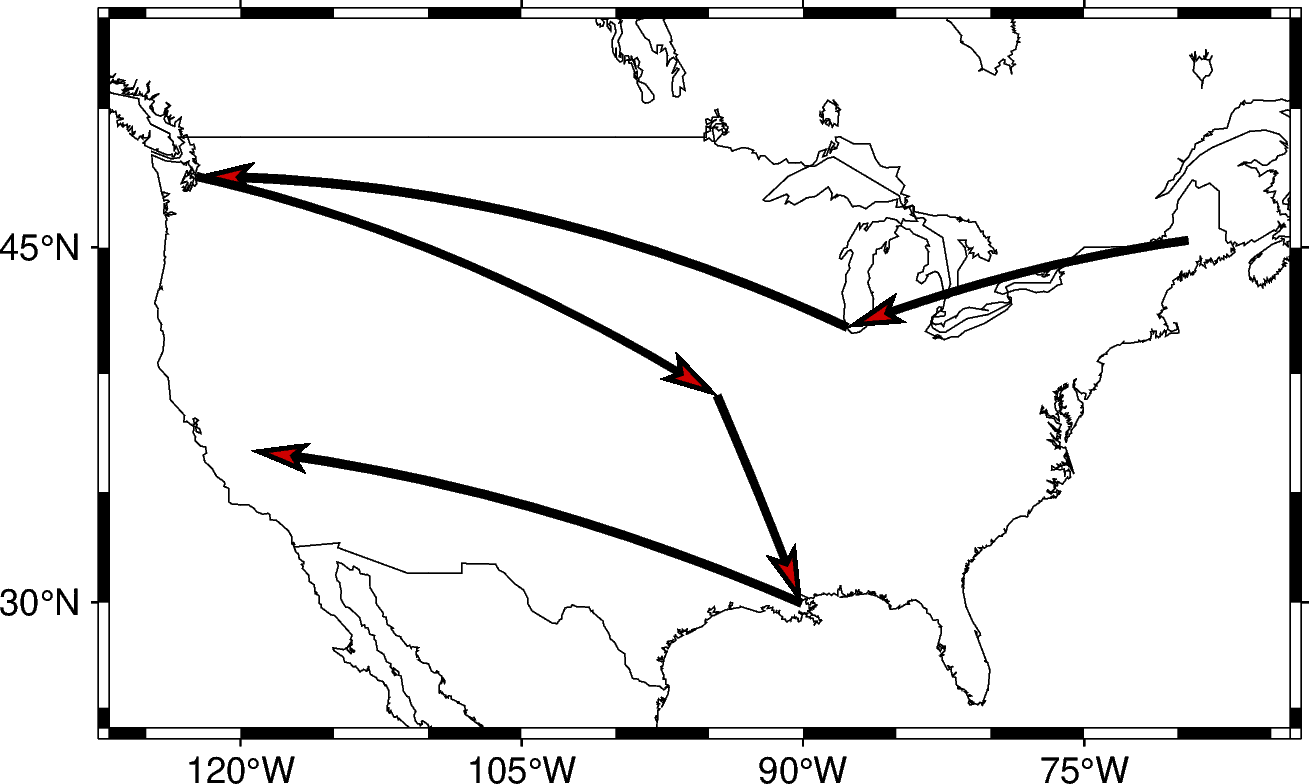

In [13]:
# Plotting multiple geographic vectors
# [[start_latitude, start_longitude, end_latitude, end_longitude]]

# Coordinate pairs for all the locations used
ME = [-69.4455, 45.2538]
CHI = [-87.6298, 41.8781]
SEA = [-122.3321, 47.6062]
NO = [-90.0715, 29.9511]
KC = [-94.5786, 39.0997]
CA = [-119.4179, 36.7783]

# Add array to piece together the vectors
data = [ME + CHI, CHI + SEA, SEA + KC, KC + NO, NO + CA]

fig = pygmt.Figure()
fig.coast(
    region=[-127, -64, 24, 53],
    projection="M10c",
    frame=True, borders=1,
    shorelines="0.25p,black",
    area_thresh=4000,
)
fig.plot(
    data=data,
    style="=0.5c+ea+s", pen="2p", color="red3",
)
fig.show()

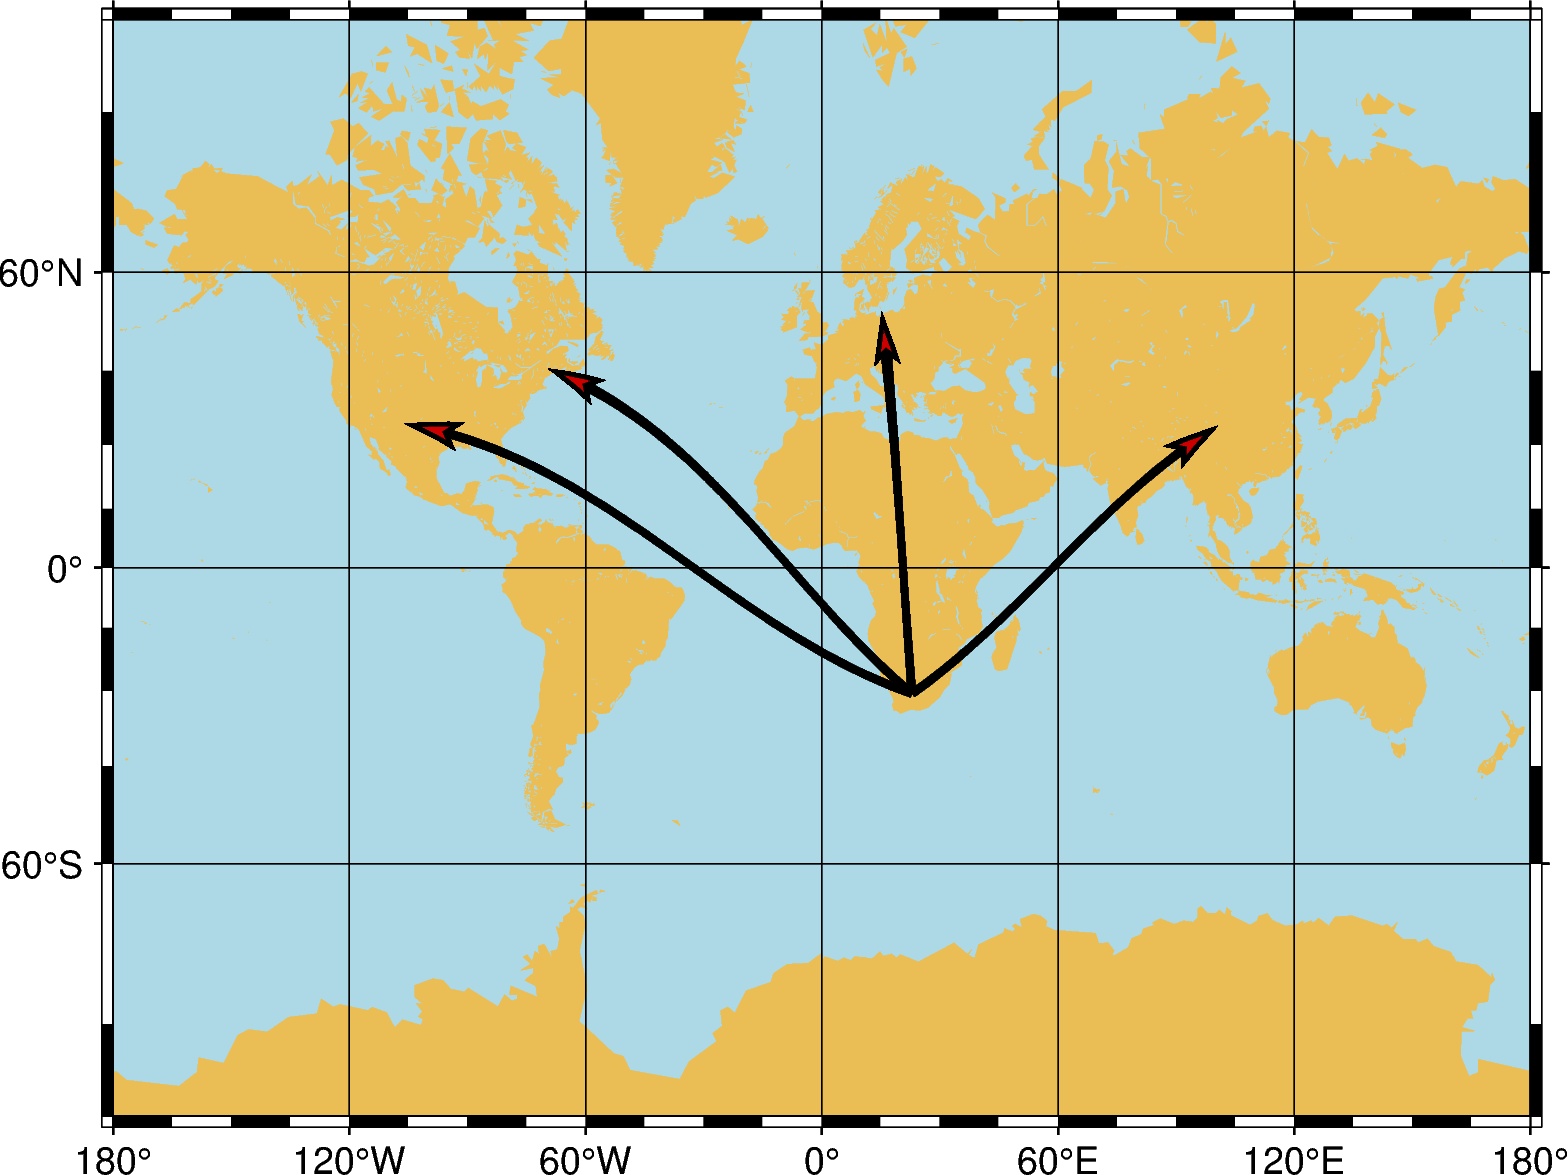

In [14]:
# Plotting vectors over a Mercator Projection
SA = [22.9375, -30.5595]
EUR = [15.2551, 54.5260]
ME = [-69.4455, 45.2538]
AS = [100.6197, 34.0479]
NM = [-105.8701, 34.5199]
data = np.array([SA + EUR, SA + ME, SA + AS, SA + NM])

fig = pygmt.Figure()
fig.coast(
    region=[-180, 180, -80, 80],
    projection="M0/0/12c",
    frame="afg",
    land="lightbrown",
    water="lightblue",
)
fig.plot(
    data=data,
    style="=0.5c+ea+s",
    pen="2p",
    color="red3",
)
fig.show()